In [2]:
import pandas as pd
df = pd.read_csv('ML-chat-reg.csv')
df[1:40]

,age,height,weight,gender,likeness
1,41,165.000,70.00,Male,Biryani
2,29,171.000,80.00,Male,Biryani
3,27,173.000,102.00,Male,Biryani
4,29,164.000,67.00,Male,Biryani
5,28,174.000,46.00,Female,Biryani
6,27,151.000,64.30,Female,Biryani
7,34,176.500,98.00,Male,Biryani
8,32,181.000,87.50,Male,Biryani
9,22,184.500,80.00,Male,Biryani
10,29,163.500,65.00,Male,Pakora


In [3]:
df.shape

(245, 5)

### transform male in to integer (male to 1 and female to 0)

In [4]:
df['gender'] = df['gender'].replace('Male',1)
df['gender'] = df['gender'].replace('Female',0)

In [5]:
df.tail(),df.head()

(     age  height  weight  gender likeness
 240   31   160.0    60.0       1   Pakora
 241   26   172.0    70.0       1  Biryani
 242   40   178.0    80.0       1  Biryani
 243   25     5.7    65.0       1  Biryani
 244   33   157.0    56.0       0   Samosa,
    age   height  weight  gender likeness
 0   27  170.688    76.0       1  Biryani
 1   41  165.000    70.0       1  Biryani
 2   29  171.000    80.0       1  Biryani
 3   27  173.000   102.0       1  Biryani
 4   29  164.000    67.0       1  Biryani)

In [6]:
# selection of input and output variable
x = df[['weight','gender']] # its 2d array so need to two [[]]
y = df['likeness']

In [7]:
y.head()

0    Biryani
1    Biryani
2    Biryani
3    Biryani
4    Biryani
Name: likeness, dtype: object

### apply machine learning 

In [8]:
from sklearn.tree import DecisionTreeClassifier
# create and fit the model (decision tree classifier)
model = DecisionTreeClassifier().fit(x,y)

#prediction

model.predict([[23,0]])

C:\Users\Hisham Khalil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Biryani'], dtype=object)

### to check the accuracy of the model 

In [9]:
# to do split test data and train data 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score # import metrix from sk learn 

# splitting data set into the test and training 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) # random_state = 0 or 1 or remove this which will give the change the accuracy every time 

#create model

model = DecisionTreeClassifier()

#fitting the model 

model.fit(x_train,y_train) # for the fitting the we have given the train data in term of x_train and output can be check in term of y_training 
 
# now for the prediction we are giving the test data which has been splitting before 

predicted_values = model.predict(x_test)

predicted_values



array(['Biryani', 'Biryani', 'Pakora', 'Biryani', 'Samosa', 'Biryani',
       'Pakora', 'Biryani', 'Biryani', 'Biryani', 'Samosa', 'Samosa',
       'Samosa', 'Pakora', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Pakora', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Samosa', 'Biryani', 'Samosa',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Samosa', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani'], dtype=object)

In [10]:
# check accuracy score 

score = accuracy_score(y_test,predicted_values)

score  # find the score for data y_test

0.6122448979591837

### how to train and save your model

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import joblib 

model = DecisionTreeClassifier().fit(x,y) # take the whole data set for saving the trained model 

joblib.dump(model,"food.joblib") # save or store a model 

['food.joblib']

### how to run the stored or saved model on a dataset (import and run)

In [18]:
#graph 

model = DecisionTreeClassifier().fit(x,y)


# graphic evaluation/ look into what happpend 
import graphviz


dot_data=tree.export_graphviz(model,
                    out_file='food1.dot',
                    feature_names=['age','gender'],
                    class_names=sorted(y.unique()), 
                    label='all',
                    rounded=True,
                    filled=True)


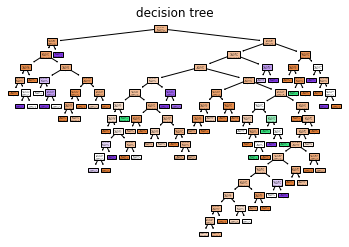

In [16]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt
plt.figure()
model = DecisionTreeClassifier().fit(x,y)
plot_tree(model,filled=True)
plt.title("decision tree")
plt.show()